# k平均法(k-Means)

クラスタリングにおいて最もシンプルで一般的な手法であるk-Meansについて学びましょう。

## k-Meansとは

### 概要

k-meansとは、教師なし学習の一種です。クラスタリングに利用されます。

●k-NNの立ち位置

- 機械学習
    - 教師あり学習
    - 教師なし学習
        - クラスタリング
            - 階層型クラスタリング
            - 非階層型クラスタリング
                - ハードクラスタリング
                    - k-Means
                - ソフトクラスタリング
                
さて、教師なし学習であるクラスタリングは教師あり学習とは異なり、パラメータの学習に「訓練ラベル（教師ラベル）」を利用しません。

K-Meansのパラメータ学習段階では、何らかの指標に基づいて、データを任意の数のクラスタ（グループ）に振り分けます。  
このクラスタ（cluster）はクラス（class）とは別物ですので注意してください。

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/8yptHd0JDlw" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

###  アルゴリズム
>1. 各点$x_i$に対してランダムにクラスタを割り振る
>1. 各クラスタに割り当てられた点について重心を計算する
>1. 各点について上記で計算された重心からの距離を計算し、距離が一番近いクラスタに割り当て直す。
>1. 2.と3.の工程を、割り当てられるクラスタが変化しなくなるまで行う
>
>(引用 https://qiita.com/g-k/items/0d5d22a12a4507ecbf11)

k-Meansの仕組みについては [K-means 法を D3.js でビジュアライズしてみた - てっく煮ブログ](http://tech.nitoyon.com/ja/blog/2013/11/07/k-means/) が非常に分かりやすいので，確認してください．

## k-MeansのScikit-Learn実装を使った演習

### パッケージの用意とデータの確認

k-Meansをsklearnを使って試してみましょう。  

インポートするパッケージは以下の通りです。(matplotlibとplotlyをimportしていますが、どちらか得意な方を利用すれば問題ありません）

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
SEED = 2022

さて、まずはデータを読み込みましょう。  
今回はwine datasetを利用します。

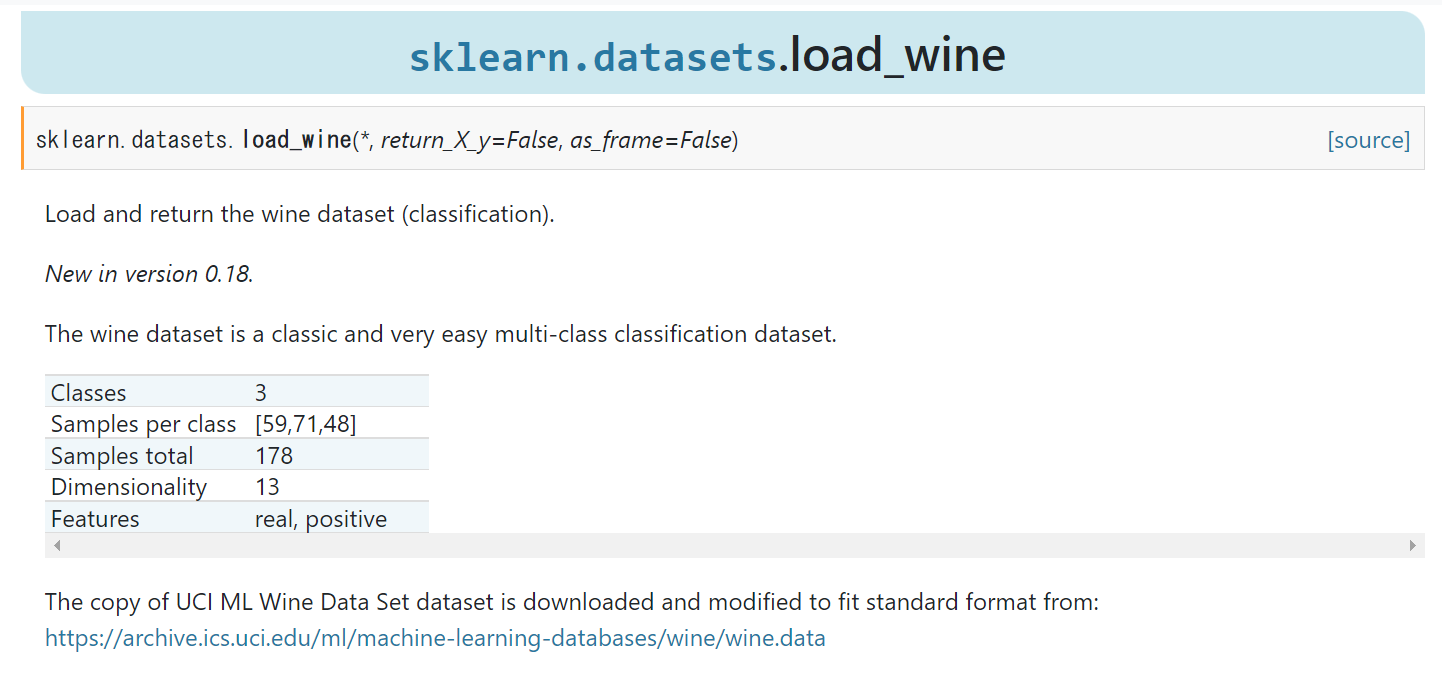

load_wine関数にはas_frameというオプションがあります。これをTrueにすることで、DataFrameを含んだ返り値をくれるので、使ってみましょう。

In [4]:
wine = load_wine(as_frame=True)
wine_df = pd.DataFrame(wine.frame)
wine_df.head(20)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [6]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


このDataFrameを自分で操作して、データがどのような形なのかを確認してください。  
データは全部で178個、3クラス。 irisと異なりクラスごとのデータの数はバラバラです。  
確認してみましょう。

In [7]:
for i in range(3):
    n_items = (wine_df["target"] == i).sum()
    print(f"クラス{i}のデータ数: {n_items}個")

クラス0のデータ数: 59個
クラス1のデータ数: 71個
クラス2のデータ数: 48個


ちなみに、クラスを基準に可視化するとこのようになります。

In [8]:
px.scatter_matrix(wine_df, 
                  dimensions=wine_df.columns[:5], 
                  color=wine_df["target"],
                  height=700,width=800,
                  title="一部の説明変数ペアを使ったクラスの確認"
                 )

train_test_splitはdataframeを渡すこともできます。確認してみましょう。

In [9]:
X_train,X_test, y_train, y_test = train_test_split(wine_df.iloc[:,:-1], # 分割したいデータを列挙
                                                   wine_df.target, # 分割したいデータを列挙
                                                   test_size=0.3, # テストデータの割合
                                                   stratify=wine_df.target, # 層化サンプリングの指針になるlabelを指定
                                                   random_state=SEED # 乱数シードの設定
                                                  )

In [10]:
print(type(X_train))
X_train.head()

<class 'pandas.core.frame.DataFrame'>


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
118,12.77,3.43,1.98,16.0,80.0,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372.0
47,13.90,1.68,2.12,16.0,101.0,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985.0
14,14.38,1.87,2.38,12.0,102.0,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547.0
37,13.05,1.65,2.55,18.0,98.0,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0


In [11]:
print(type(X_test))
X_test.head()

<class 'pandas.core.frame.DataFrame'>


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.900000,1.71,2.87,407.0
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.000000,0.57,1.96,660.0
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0
18,14.19,1.59,2.48,16.5,108.0,3.30,3.93,0.32,1.86,8.700000,1.23,2.82,1680.0
108,12.22,1.29,1.94,19.0,92.0,2.36,2.04,0.39,2.08,2.700000,0.86,3.02,312.0


In [12]:
print(type(y_train))
y_train.head()

<class 'pandas.core.series.Series'>


118    1
47     0
14     0
37     0
174    2
Name: target, dtype: int64

In [13]:
print(type(y_test))
y_test.head()

<class 'pandas.core.series.Series'>


115    1
158    2
171    2
18     0
108    1
Name: target, dtype: int64

sklearnはDataFrameを入力に受け取っても正しく動作するので、今回はこのまま利用していくことにしましょう。

### データの前処理

それではsklearnのk-Meansを利用してみましょう。

1. クラスからインスタンスを生成
2. `fit`で訓練
3. 各種評価指標でクラスタリングの性能を評価

この流れにそって、実験を行います。

しかしその前に、データの前処理を行います。

参考: https://www.rm48.net/post/python-k-means%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0%E3%82%92%E3%81%99%E3%82%8B%E3%81%A8%E3%81%8D%E3%81%AF%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E8%A6%8F%E6%A0%BC%E5%8C%96%E3%80%81%E6%A8%99%E6%BA%96%E5%8C%96%E3%82%92%E3%81%99%E3%82%8B

In [14]:
scaler =  StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### sklearnによる訓練

K-Meansクラスの使い方は?を使って確認しておきます。

```python
>>>KMeans?
```
```python
Init signature:
KMeans(
    n_clusters=8, # クラスタの数
    *,
    init='k-means++', # 初期化の方法。k-means++は非常に優秀な初期化方法です。ナイーブに実装した場合の初期化は"randam"が相当します。
    n_init=10, # k-meansの性能は初期値に大きく影響されます。sklearnは異なるseedで初期化をn_init回行い、最も良いものを選択します。
    max_iter=300, # 最大更新回数
    tol=0.0001, # 許容誤差, これ以下になれば最大更新回数に達していなくても学習を終了します。
    verbose=0,  # 詳しい解析結果を表示するなら1、何も表示しないならば0
    random_state=None, # 擬似乱数生成器に渡すSEED
    copy_x=True, # 
    algorithm='auto',
)
```

algorithm  
- {"lloyd"、"elkan"、"auto"、"full"}、default ="lloyd"
- 使用するK-meansのアルゴリズムを設定します。
- 古典的なEM式アルゴリズムは "lloyd "ですが、"elkan "は三角形の不等式を用いることにより、クラスタが明確に定義されたデータセットではより効率的となることがあります。しかし、形状の配列(n_samples, n_clusters) を追加で割り当てるため、よりメモリを消費します。

"auto"と "full"は非推奨で、Scikit-Learn 1.3 で削除される予定です。これらは両方とも "lloyd" のエイリアスです。

それではインスタンスを生成します。

In [15]:
skmodel = KMeans(3, random_state=SEED)

次に、`fit`の使い方を確認してから、実行しましょう。

In [16]:
skmodel.fit?

Signature: skmodel.fit(X, y=None, sample_weight=None)
Docstring:
Compute k-means clustering.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    Training instances to cluster. It must be noted that the data
    will be converted to C ordering, which will cause a memory
    copy if the given data is not C-contiguous.
    If a sparse matrix is passed, a copy will be made if it's not in
    CSR format.

y : Ignored
    Not used, present here for API consistency by convention.

sample_weight : array-like of shape (n_samples,), default=None
    The weights for each observation in X. If None, all observations
    are assigned equal weight. `sample_weight` is not used during
    initialization if `init` is a callable or a user provided array.

    .. versionadded:: 0.20

Returns
-------
self : object
    Fitted estimator.
File:      ~/workspace/prpy/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py
Type:      method

In [17]:
skmodel.fit(scaled_X_train)

KMeans(n_clusters=3, random_state=2022)

### 結果の可視化

クラスタリングの結果を散布図にして確認してみます。  
ここでは、説明変数が多すぎるので幾つかのペアを取り出して可視化を行います。

In [18]:
result_df = X_train.iloc[:,:5].copy()
result_df["cluster_index"] = skmodel.predict(scaled_X_train)
result_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,cluster_index
118,12.77,3.43,1.98,16.0,80.0,2
47,13.90,1.68,2.12,16.0,101.0,0
14,14.38,1.87,2.38,12.0,102.0,0
37,13.05,1.65,2.55,18.0,98.0,0
174,13.40,3.91,2.48,23.0,102.0,2


In [19]:
px.scatter_matrix(result_df, 
                  dimensions=result_df.columns[:4], 
                  color="cluster_index",
                  height=700,width=800,
                  title="一部の説明変数ペアを使ったクラスタの確認"
                 )

割り当てたクラスタが色に対応するような可視化を行いました。黄色クラスタとそれ以外に関しては比較的わかりやすい分かれ方をしていますが、青と紫に関してはかぶりが多いようです。

### エルボー法によるクラスタ数の決定

もっともらしいクラスタの数はどうやって決めれば良いのでしょうか。ここでは、エルボー法という最もシンプルな方法でのクラスタ数決定に挑戦します。



**エルボー法**   
Kの値を変えながら、SSE(Sum of Squared errors of prediction, クラスタ内誤差平方和)をプロットする。SSEが急激に減少した点（Elbow（エルボー、肘）のように折れ線がカクッと折れ曲がる点）がより良いクラスタ数である。

<u>SSEはデータ点からクラスタ重心までの距離の合計を凝集度とします</u>。  
それを全クラスタに関して計算し足し合わせます。  
足し合わせた値を歪み(distortion)と言っているところが多いです。  

sklearnではSSEをself.inertia_として持っています。これを使ってエルボー法を試します。

In [20]:
score_df = {"num_cluster":[], "cluster inertia (SSE)":[]}
for i in range(2,20):
    skmodel = KMeans(n_clusters=i, random_state=SEED)
    skmodel.fit(scaled_X_train)
    score_df["num_cluster"] += [i]
    score_df["cluster inertia (SSE)"] += [skmodel.inertia_]

In [21]:
px.line(score_df, 
        x="num_cluster", y="cluster inertia (SSE)",
        title="エルボー法: クラスタ数とクラスタ内誤差平方和（SSE）の関係",
       )

ここではk=3が良さそうだとわかります。

In [22]:
skmodel.transform(scaled_X_test)

array([[6.55874475, 4.18748589, 7.48529467, ..., 4.80866115, 6.61572635,
        5.26553473],
       [6.45395404, 6.99780301, 5.46578485, ..., 6.74317749, 6.1764118 ,
        6.96826739],
       [6.65194357, 5.30732135, 3.08178342, ..., 6.36043976, 2.87516042,
        7.43434015],
       ...,
       [2.53297739, 3.61712581, 5.50516809, ..., 3.90846158, 4.34940304,
        4.72671423],
       [1.27874731, 4.93845711, 6.44699755, ..., 4.09845814, 5.83402466,
        4.68153257],
       [6.07682719, 5.73098528, 3.90684894, ..., 5.94310883, 4.07570302,
        6.61594602]])

## k-MeansのNumpyによる実装

このセクションではk-NNをNumPyを使って実装してもらいます。

### k-Meansクラス実装のヒント

k-Meansクラスの雛形を示します。

In [34]:
class KMeansClustering():
    def __init__(self,k, max_iter, delta, seed=1000):
        """初期化

        Parameters
        ----------
        k : int, optional
            クラスタ数, by default 3
        max_iter : int, optional
            最大更新回数, by default 100
        delta : float, optional
            許容誤差, by default 1e-15
        seed : int, optional
            疑似乱数シード, by default None.
            Noneなら[0,2**20)の範囲でランダムにSEEDを生成
        """
        ...
        self.is_fitted = False
        
        
    def fit(self, X,y=None):
        self.inertia_ = ... # クラスタ内SSEを保存しましょう。
        ...
        return self
    
    def predict(self,X:np.ndarray)->np.ndarray:
        # 入力データに対してクラスタを割り当てる
        pred_labels = ...
        return pred_labels
    
    def transform(self, X:np.ndarray)->np.ndarray:
        """入力データとすべてのクラスタ重心との距離を計算し、行列として返す

        Parameters
        ----------
        X : np.ndarray
            入力データ Shape(n_data, n_features)

        Returns
        -------
        embedded
            Shape(n_data, self.k)
        """
        embedded = ...
        return embedded

### [基礎]以下の要点を満たすように、`KMeansClustering`クラスを修正してk-Meansを実装してください。

`__init__`について

1. docstringを参考に引数の表記を修正 (ex. `seed:int=1000`) 
1. すべての引数を同様の名前のインスタンス変数として束縛
1. クラス内からは`self.rng`の名前でnumpyの乱数生成器インスタンスにアクセスできるようにする


`fit`について
1. クラスタ内SSEをself.inertia_に保存する
1. データ点と各クラスタの暫定重心とのユークリッド距離を基準に訓練を行う
1. t時点の重心とt-1時点の重心のユークリッド距離がself.delta以下になったら訓練終了

`transform`について
1. Xのdtypeとembeddedのdtypeを揃える
1. このメソッドは`fit`が実行されていないのに呼び出された場合、警告する
1. このメソッドの入力Xがfitの入力Xと異なる次元数（特徴数）である場合、警告する


#### KMeansClustering クラスの実装例

上の問題の回答にあたる，KMeansClusteringクラスの実装例を示します．

In [67]:
class KMeansClustering():
    def __init__(self,k:int=3,max_epochs:int=100, n_init:int=1, delta:float=1e-15, seed:int|None=None):
        """初期化

        Parameters
        ----------
        k : int, optional
            クラスタ数, by default 3
        max_epochs : int, optional
            最大更新回数, by default 100
        n_init : int, optional
            初期インスタンス生成数, by default 1
        delta : float, optional
            許容誤差, by default 1e-15
        seed : int, optional
            疑似乱数シード, by default None
        """
        self.k = k 
        self.max_epochs = max_epochs
        self.delta = delta # Tolerance for stopping criterion. 
        self.seed = seed if isinstance(seed, int) else np.random.randint(2**20)
        self.rng = np.random.default_rng(self.seed)
        self.n_init=n_init
        
    def fit(self, X,y=None):
        num_data, num_features = X.shape
        
        # initialize centroids
        """
        self.centroids = np.zeros((self.k, num_features))
        for i in range(num_features):
            max_value = np.max(X[:,i])
            min_value = np.min(X[:,i])
            centroid = self.rng.uniform(min_value,max_value, size=(self.k,))
            self.centroids[:,i] = centroid
        """
        # initialize labels
        labels = self.rng.integers(self.k, size=(num_data))
        
        # initialize centroids
        centroids = []
        for label in range(self.k):
            current_members = X[labels == label]
            new_centroid = current_members.mean(axis=0)
            centroids.append(new_centroid)
        self.centroids = np.vstack(centroids)
        self._labels = [labels]
        # initialize labels  
        labels = self.predict(X)
        self._labels.append(labels)
        
        for epoch in range(self.max_epochs):
            delta = np.zeros(self.k)
            # update labels  
            labels = self.predict(X)
            self._labels.append(labels)
            
            # update centroids
            for label in range(self.k):
                mask = labels == label
                assert mask.sum()!=0, f"更新{epoch}回目でクラスタ{label}が消滅した. {mask.sum()}"
                
                current_members = X[mask]
                new_centroid = current_members.mean(axis=0)
                delta[label] = np.linalg.norm(self.centroids[label] - new_centroid)
                self.centroids[label] = new_centroid
                
            # breaking condition
            if self.delta >= delta.mean():
                #print(f"breaking at epoch-{epoch}")
                #labels = self.predict(X)
                #self._labels.append(labels)
                break
                
        return self
    
    def predict(self,X):
        # update labels 
        labels = np.zeros(X.shape[0], dtype=int)
        for index, x in enumerate(X):
            distance = np.linalg.norm(self.centroids - x, axis=1)
            labels[index] = np.argmin(distance)
        return labels
    
    def transform(self, X):
        embed = []
        for index, x in enumerate(X):
            distance = np.linalg.norm(self.centroids - x, axis=1)
            embed.append(distance)
        
        embed = np.concatenate(embed)
        return embed
    
# ------ 訓練と推論の実行
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X = scaler.transform(X_train)

model = KMeansClustering(k=3)
model.fit(X)

print("予測したクラスタ",model.predict(X))


# ------ 学習中のクラスタの変化を可視化

from sklearn.decomposition import PCA

pca = PCA(2)
X_embed = pca.fit_transform(X)

tmp = []
for i,l in enumerate(model._labels):
    df= pd.DataFrame(X_embed, columns=["PC1", "PC2"])
    #df= pd.DataFrame(X_train, columns=iris.feature_names)
    df["cluster_index"] = l
    df["epoch"] = i
    tmp.append(df)

df = pd.concat(tmp)

#px.scatter(df, x='sepal length (cm)', y='sepal width (cm)',color="cluster_index",
px.scatter(df, x='PC1', y='PC2',color="cluster_index",
           width=700, height=600, 
           animation_frame="epoch"
          )


[0 1 1 1 0 1 0 0 0 1 1 2 1 2 0 2 2 2 0 2 1 0 2 2 2 2 0 1 2 1 0 2 1 0 1 2 1
 0 1 2 0 0 0 0 2 2 1 0 1 0 1 2 0 2 0 0 0 2 0 2 0 1 1 2 2 1 0 1 1 1 2 2 2 1
 0 0 2 2 1 2 1 1 2 0 1 1 0 2 2 1 1 2 2 1 1 1 1 0 0 0 2 1 0 2 2 0 0 1 1 2 1
 2 1 2 0 1 2 2 1 2 2 2 2 1]


関数として実装した例を以下に示します．

In [1]:
# 関数として実装した例

def kmeans(X, K:int=3, N:int=100):
    D,F = X.shape # インスタンス数 ✖️ 特徴数
    labels = np.random.randint(0,K,size=D)
    centroids = np.zeros((K,F))
    for k in range(K): 
        centroids[k] = X[labels==k].mean(axis=0)
    for i in range(N):
        _labels = labels
        distance = np.linalg.norm(centroids[None,:,:] - X[:,None,:],axis=-1)
        print(distance.shape)
        labels = np.argmin(distance,axis=-1)
        for k in range(K): 
            centroids[k] = X[labels==k].mean(axis=0)
        if (_labels == labels).sum() == D:
            break    
    return labels

def kmeans(X, K:int=3, N:int=100, eps:float=1e-7):
    D,F = X.shape # インスタンス数 ✖️ 特徴数
    labels = np.random.randint(0,K,size=D)
    centroids = np.zeros((K,F))
    for k in range(K): 
        centroids[k] = X[labels==k].mean(axis=0)
    for i in range(N):
        _labels = labels
        #distance = np.linalg.norm(centroids[None,:,:] - X[:,None,:],axis=-1)
        distance = np.zeros((D,K))
        for d in range(D):
            for k in range(K):
                distance[d,k] = np.sum((X[d]-centroids[k])**2)**(1/2)
        labels = np.argmin(distance,axis=-1)
        for k in range(K): 
            centroids[k] = X[labels==k].mean(axis=0)
        if (_labels == labels).sum() == D:
            break    
    return labels

"""
distance = np.zeros((D,K))
for d in range(D):
    for k in range(K):
        distance[d,k] = np.sum((X[d]-centroids[k])**2)**(1/2)
""";
kmeans(X)

NameError: name 'X' is not defined

### [基礎] KMeansClustering`を使って、iris datasetに適切なkをエルボー法で求めよ



In [70]:
pass

### [発展] クラスタリングの評価指標として利用されるPurityについて調べて、関数として実装せよ。またK=2からk=20までのpurityを計算し、折れ線グラフで示せ。

純度(Purity)はクラスター内に含まれる教師ラベルの内，最もクラスター内に多くのインスタンス数を持つものの割合の重み付き和のこと。

In [69]:
pass

### [発展]シルエット分析について調べ、これを実装せよ。またK=3,10の場合の結果を示せ。

In [71]:
pass

https://hkawabata.github.io/technical-note/note/ML/k-means.html